In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import os
import matplotlib.pyplot as plt

In [71]:
path_to_test_csv_out = '/Users/danielfisher/Projects/kcl-globalgasflaring/data/processed/yearly'
df = pd.read_csv(os.path.join(path_to_test_csv_out, 'ats_2006.csv'))


In [96]:
new_df = df

In [97]:
coords = new_df.as_matrix(columns=['lats', 'lons'])

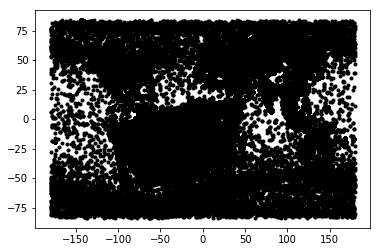

In [98]:
plt.plot(coords[:,1], coords[:,0], 'k.')
plt.show()

In [99]:
kms_per_radian = 6371.0088
epsilon = 1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [100]:
cluster_labels = db.labels_
len(set(cluster_labels))

2779

In [101]:
new_df['clusters'] = cluster_labels

In [102]:
sub_df = new_df[new_df['clusters'] != -1]

In [103]:
grouped_df = sub_df.groupby('clusters').agg({'frp': np.mean, 'lats': np.mean, 'lons': np.mean})

In [104]:
grouped_df.head()

,lons,frp,lats
clusters,,,
0,-60.156987,1.689758,-33.368187
1,-69.941399,2.224130,8.907966
2,-66.401424,0.803525,9.679796
3,-66.320392,0.788363,9.872165
4,-70.231530,3.893164,11.623296


In [105]:
sub_coords = grouped_df.as_matrix(columns=['lats', 'lons'])

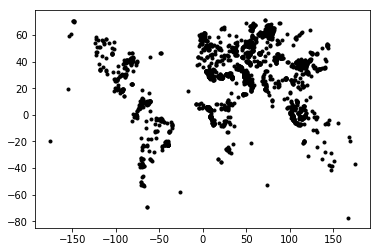

In [106]:
plt.plot(sub_coords[:,1], sub_coords[:,0], 'k.')
plt.show()